# Задачи к Лекции 1

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [92]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns

z = zipfile.ZipFile("/content/athlete_events (3).zip")
df = pd.read_csv(z.open("athlete_events.csv"))
#df = pd.read_csv("/content/athlete_events.csv")
#import csv
#df = pd.read_csv("/content/athlete_events.csv", header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


**Получение различной информации**

In [5]:
df.shape

(30181, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,ID,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

In [91]:
# Your code here
#print(df.[''] where  )
#df['text_lower']  = df['review'].str.lower()
#df[(df['gender'] == 1) & (df['gluc'] == 1)].head(3)

#df[(df["Medal"] == "Bronze") & (df["Sex" == "M"])].head(3)
df[(df["Height"] == 175.0)].head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,NaN,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,NaN,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,NaN,Gymnastics Men's Horse Vault,Gold


In [20]:
print("Общее количество медалистов:", df["Sex"].count())
print(df[['Sex', 'Medal']].value_counts())

Общее количество медалистов: 30181
Sex  Medal 
M    Gold      6730
     Bronze    6673
     Silver    6428
F    Bronze    3475
     Silver    3438
     Gold      3437
Name: count, dtype: int64


In [22]:
#df1['Medal_num'] = df1['Medal'].map(
#    {'Gold': 1, 'Silver': 2, 'Bronze': 3}
#)
#df1[['Medal', 'Medal_num']].head()

In [21]:
#df1[(df1["Medal_num"] == 1)& (df1["Sex_num"] == 1)].count()

**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [101]:
df[['Team', 'Medal']].value_counts()

Team                          Medal 
United States                 Gold      2075
                              Silver    1260
Soviet Union                  Gold       961
United States                 Bronze     938
Soviet Union                  Silver     629
                                        ... 
Gabon                         Silver       1
United Arab Emirates          Bronze       1
                              Gold         1
United States Virgin Islands  Silver       1
Argonaut Rowing Club          Bronze       1
Name: count, Length: 517, dtype: int64

In [102]:
df[['Team', 'Medal']].value_counts().head(1)

,,count
Team,Medal,
United States,Gold,2075


**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

In [61]:
pd.crosstab(df['Sex'], df['Sport'], margins=True)

Sport,Alpine Skiing,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Beach Volleyball,Biathlon,Bobsleigh,...,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling,All
Sex,,,,,,,,,,,,,,,,,,,,,
F,180,100,0,1239,73,0,390,35,147,24,...,72,84,14,15,0,469,191,105,68,10350
M,174,106,2,2409,81,333,610,33,241,259,...,72,89,15,15,8,489,573,427,899,19831
All,354,206,2,3648,154,333,1000,68,388,283,...,144,173,29,30,8,958,764,532,967,30181


**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

In [71]:
df.pivot_table(['Age'],
               ['Sex', 'Sport'], aggfunc=[np.mean, np.std])

<ipython-input-71-3119244497>:1: FutureWarning: The provided callable <function mean at 0x7b21f9bd6340> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(['Age'],
<ipython-input-71-3119244497>:1: FutureWarning: The provided callable <function std at 0x7b21f9bd6480> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.pivot_table(['Age'],


mean       std
                         Age       Age
Sex Sport                             
F   Alpine Skiing  23.383333  3.550553
    Archery        24.280000  5.425492
    Athletics      25.197740  4.150885
    Badminton      24.671233  3.095942
    Basketball     25.576923  4.236332
...                      ...       ...
M   Tug-Of-War     24.875000  2.799872
    Volleyball     26.773006  4.055406
    Water Polo     26.235602  4.078597
    Weightlifting  25.362998  3.944669
    Wrestling      25.924360  3.490180

[101 rows x 2 columns]

In [95]:
a = df[(df['Sex'] == 'F') & (df['Sport'] == 'Ice Hockey')]
print("Средний возраст: ", a['Age'].mean())
print('Стандартное отклонение:', a['Age'].std())

Средний возраст:  24.42
Стандартное отклонение: 4.360463907080283


**5. У какой страны больше всего было больше всего женщин, получивших бронзовую медаль?**

In [103]:
a = df[(df['Sex'] == 'F') & (df['Medal'] == 'Bronze')]
a['Team'].value_counts()

,count
Team,
United States,360
Germany,226
Canada,196
Australia,186
Soviet Union,186
...,...
Latvia,1
Unified Team-2,1
Liechtenstein,1


In [105]:
a['Team'].value_counts().head(1)

,count
Team,
United States,360


**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

In [111]:
df[['Team', 'Medal']].value_counts().head(10)

Team           Medal 
United States  Gold      2075
               Silver    1260
Soviet Union   Gold       961
United States  Bronze     938
Soviet Union   Silver     629
               Bronze     613
Germany        Bronze     540
               Gold       508
Australia      Bronze     471
Germany        Silver     470
Name: count, dtype: int64

In [136]:
top = df.groupby(['Team', 'Medal']).size().unstack(fill_value=0)

top['Total'] = top.sum(axis=1)

#топ-3 стран
top3 = top.nlargest(3, 'Total')
top3

Medal,Bronze,Gold,Silver,Total
Team,,,,
United States,938,2075,1260,4273
Soviet Union,613,961,629,2203
Germany,540,508,470,1518


In [126]:
#US = df[(df['Team'] == 'United States') & (df['Medal'])]
#US = US['Medal'].value_counts()

#SU = df[(df['Team'] == 'Soviet Union') & (df['Medal'])]
#SU = SU['Medal'].value_counts()

#G = df[(df['Team'] == 'Germany') & (df['Medal'])]
#G = G['Medal'].value_counts()

#US['Dataset'] = 'United States'
#SU['Dataset'] = 'Soviet Union'
#G['Dataset'] = 'Germany'

#top3 = US, SU, G
#top3

(Medal
 Gold                2075
 Silver              1260
 Bronze               938
 Dataset    United States
 Name: count, dtype: object,
 Medal
 Gold                961
 Silver              629
 Bronze              613
 Dataset    Soviet Union
 Name: count, dtype: object,
 Medal
 Bronze         540
 Gold           508
 Silver         470
 Dataset    Germany
 Name: count, dtype: object)

In [127]:
import seaborn as sns

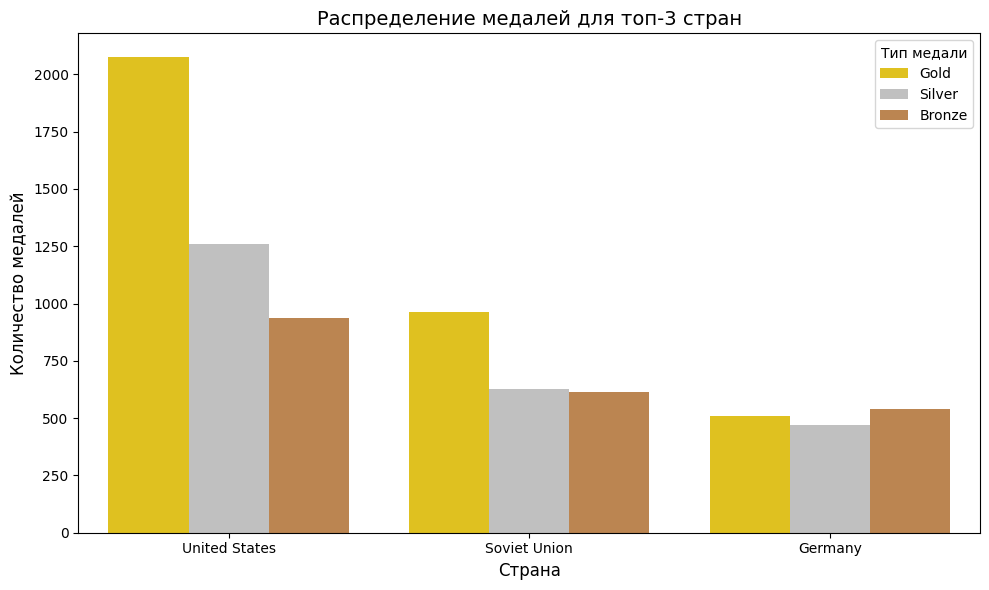

In [138]:
# Подготовка данных для визуализации
plot_data = top3[['Gold', 'Silver', 'Bronze']].reset_index()
plot_data = pd.melt(plot_data, id_vars='Team',
                    value_vars=['Gold', 'Silver', 'Bronze'],
                    var_name='Medal', value_name='Count')

# Создание гистограммы
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='Team', y='Count', hue='Medal',
            palette={'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'peru'})

# Настройка отображения
plt.title('Распределение медалей для топ-3 стран', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество медалей', fontsize=12)
plt.legend(title='Тип медали')
plt.tight_layout()
plt.show()

**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль(density или distplot)**

In [141]:
a = df[(df['Sex'] == 'M') & (df['Medal'] == 'Silver')]

<ipython-input-142-549802350>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a['Weight']);


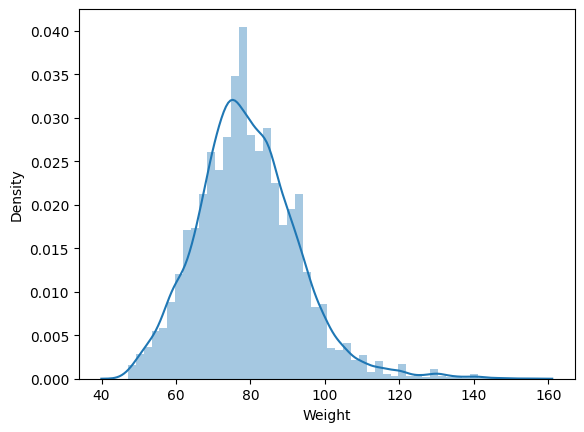

In [142]:
sns.distplot(a['Weight']);

**8. Постройте boxplot для возраста участника в зависимости от медали**

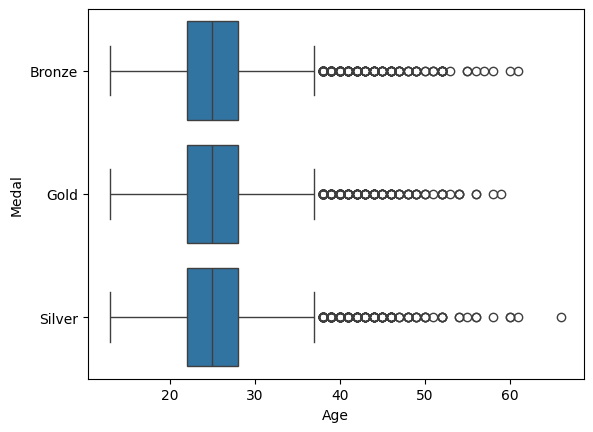

In [144]:
sns.boxplot(y="Medal", x="Age",
            data=df, orient="h");

**9. Постройте pairplot для веса, возраста и роста участников от USA.**

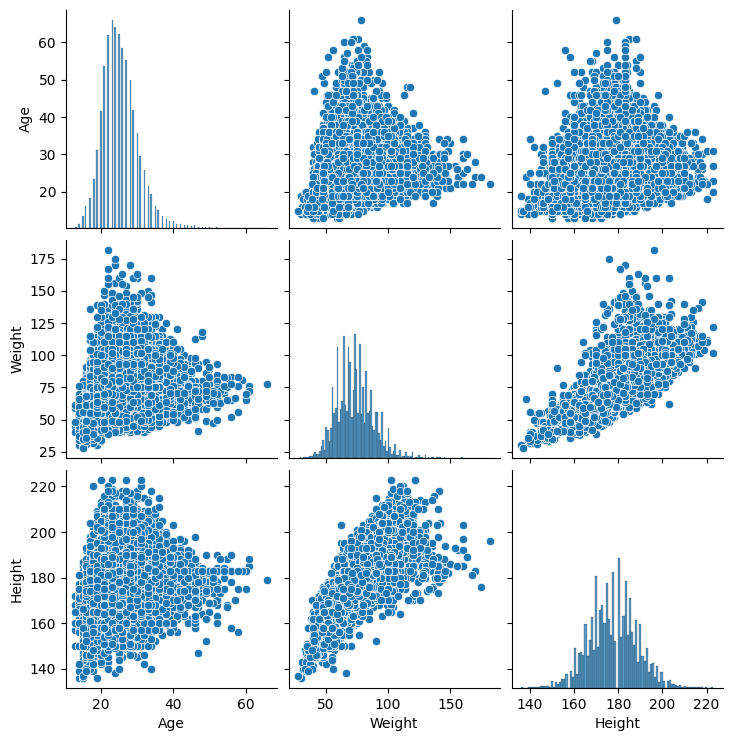

In [145]:
US = df[df['Team'] == 'United States']
sns.pairplot(df[['Age', 'Weight', 'Height']]);